In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib

#TODO 1: Load data
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

data.shape

(768, 9)

In [3]:
# Handle NaN/missing values
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, data[col][data[col] != 0].median())

#TODO: Prepare features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#TODO 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#TODO 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#TODO 4: Build and tune Gradient Boosting
n_estimators_values = [50, 100, 200, 300]
learning_rate_values = [0.01, 0.05, 0.1, 0.2]
gb_results = []

# Train and evaluate models for different hyperparameter combinations
for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        # Train Gradient Boosting
        gb = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gb.fit(X_train_scaled, y_train)
        
        # Predict and evaluate
        y_pred = gb.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        gb_results.append({
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'accuracy': accuracy,
            'roc_auc': roc_auc
        })

# Convert results to DataFrame
gb_results_df = pd.DataFrame(gb_results)


Default Gradient Boosting (n_estimators=100, learning_rate=0.1):
Accuracy: 0.7597
ROC AUC: 0.7170
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



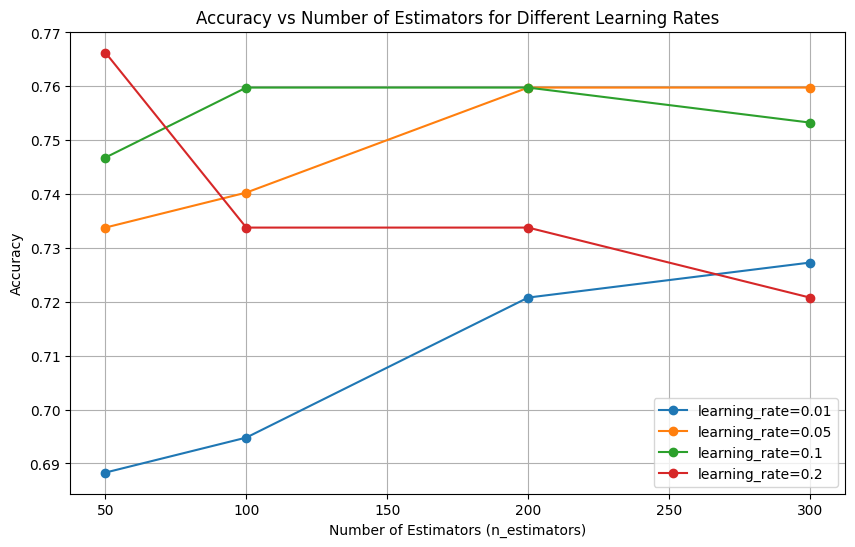

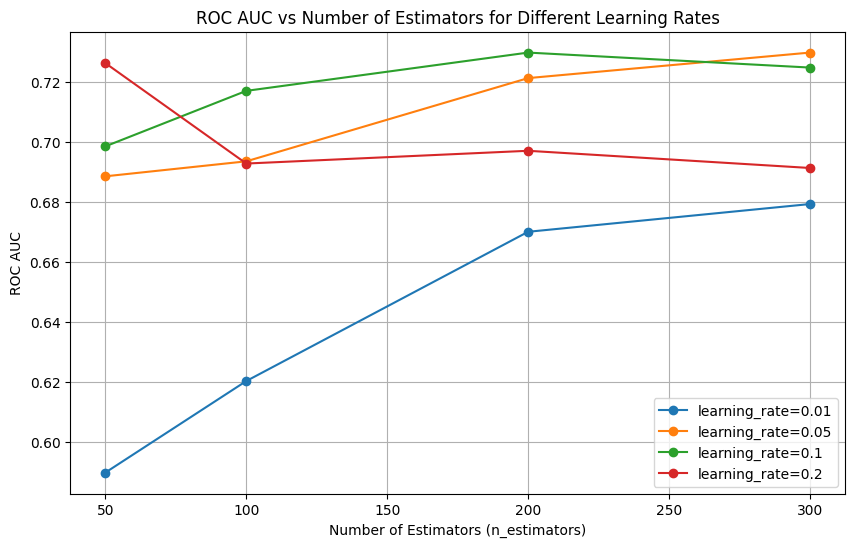

In [4]:
#NOTE: for the default model (n_estimators=100, learning_rate=0.1)
default_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
default_gb.fit(X_train_scaled, y_train)
y_pred_default = default_gb.predict(X_test_scaled)
print("\nDefault Gradient Boosting (n_estimators=100, learning_rate=0.1):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_default):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_default))

# Visualize hyperparameter impact
# Plot accuracy vs n_estimators for each learning_rate
plt.figure(figsize=(10, 6))
for lr in learning_rate_values:
    subset = gb_results_df[gb_results_df['learning_rate'] == lr]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'learning_rate={lr}')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.savefig('gb_accuracy_vs_n_estimators.png')
plt.show()

# Plot ROC AUC vs n_estimators for each learning_rate
plt.figure(figsize=(10, 6))
for lr in learning_rate_values:
    subset = gb_results_df[gb_results_df['learning_rate'] == lr]
    plt.plot(subset['n_estimators'], subset['roc_auc'], marker='o', label=f'learning_rate={lr}')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs Number of Estimators for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.savefig('gb_roc_auc_vs_n_estimators.png')
plt.show()


Best Gradient Boosting Model:
n_estimators: 200.0
learning_rate: 0.1
Accuracy: 0.7597
ROC AUC: 0.7298

Best Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



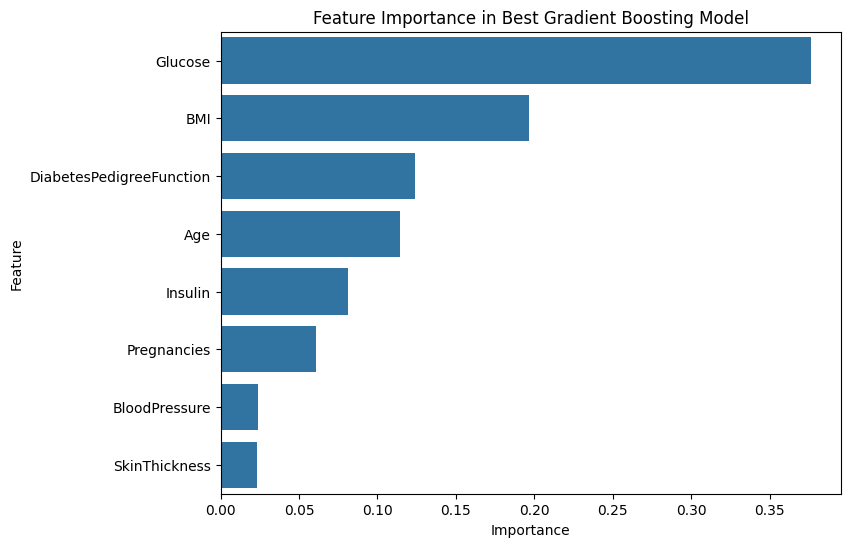


Gradient Boosting model and scaler saved as 'diabetes_gradient_boosting_model.pkl' and 'scaler.pkl'

Model Comparison:
               Model  Accuracy   ROC AUC
0      Decision Tree  0.681818  0.584630
1      Random Forest  0.779221  0.740556
2  Gradient Boosting  0.759740  0.729815


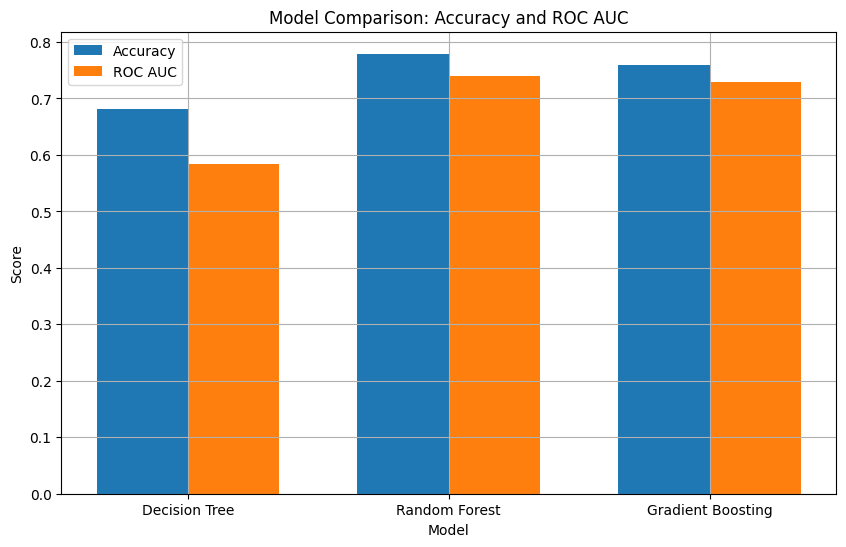


Class-wise Performance (Classification Reports):

Decision Tree:
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       100
           1       0.61      0.26      0.36        54

    accuracy                           0.68       154
   macro avg       0.65      0.58      0.58       154
weighted avg       0.66      0.68      0.64       154


Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74   

In [5]:
#TODO: Find best Gradient Boosting model
best_gb_result = gb_results_df.loc[gb_results_df['roc_auc'].idxmax()]
print("\nBest Gradient Boosting Model:")
print(f"n_estimators: {best_gb_result['n_estimators']}")
print(f"learning_rate: {best_gb_result['learning_rate']}")
print(f"Accuracy: {best_gb_result['accuracy']:.4f}")
print(f"ROC AUC: {best_gb_result['roc_auc']:.4f}")

# Train and evaluate best model
best_gb = GradientBoostingClassifier(
    n_estimators=int(best_gb_result['n_estimators']),
    learning_rate=best_gb_result['learning_rate'],
    random_state=42
)
best_gb.fit(X_train_scaled, y_train)
y_pred_best_gb = best_gb.predict(X_test_scaled)
print("\nBest Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_best_gb))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Best Gradient Boosting Model')
plt.savefig('gb_feature_importance.png')
plt.show()

# Step 3: Save the model
joblib.dump(best_gb, 'diabetes_gradient_boosting_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nGradient Boosting model and scaler saved as 'diabetes_gradient_boosting_model.pkl' and 'scaler.pkl'")

# Step 4: Compare models (Decision Tree, Random Forest, Gradient Boosting)
# Train Decision Tree (from previous project)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)

# Train Random Forest (from previous project)
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

# Gradient Boosting (best model)
gb_accuracy = best_gb_result['accuracy']
gb_roc_auc = best_gb_result['roc_auc']

# Compile results
model_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [dt_accuracy, rf_accuracy, gb_accuracy],
    'ROC AUC': [dt_roc_auc, rf_roc_auc, gb_roc_auc]
})

# Print comparison
print("\nModel Comparison:")
print(model_results)

# Visualize comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(model_results['Model']))
width = 0.35
plt.bar(x - width/2, model_results['Accuracy'], width, label='Accuracy')
plt.bar(x + width/2, model_results['ROC AUC'], width, label='ROC AUC')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy and ROC AUC')
plt.xticks(x, model_results['Model'])
plt.legend()
plt.grid(True)
plt.savefig('model_comparison.png')
plt.show()

# Analyze class-wise performance
print("\nClass-wise Performance (Classification Reports):")
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("\nGradient Boosting:")
print(classification_report(y_test, y_pred_best_gb))

# Model selection
best_model = model_results.loc[model_results['ROC AUC'].idxmax(), 'Model']
print(f"\nSelected Model: {best_model} (based on highest ROC AUC)")